## Libaries


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

## Data Load

In [5]:
data = pd.read_csv('bank_full.csv',sep = ';')
bank_data = pd.DataFrame(data)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank_data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## Data Analysis

 Distribution of Categorical Variables

In [5]:
columns = list(bank_data.columns)

In [6]:
#bar plot
def plot_barplot(col_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=bank_data[col_name])
    plt.title(f'Frequency of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

In [7]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

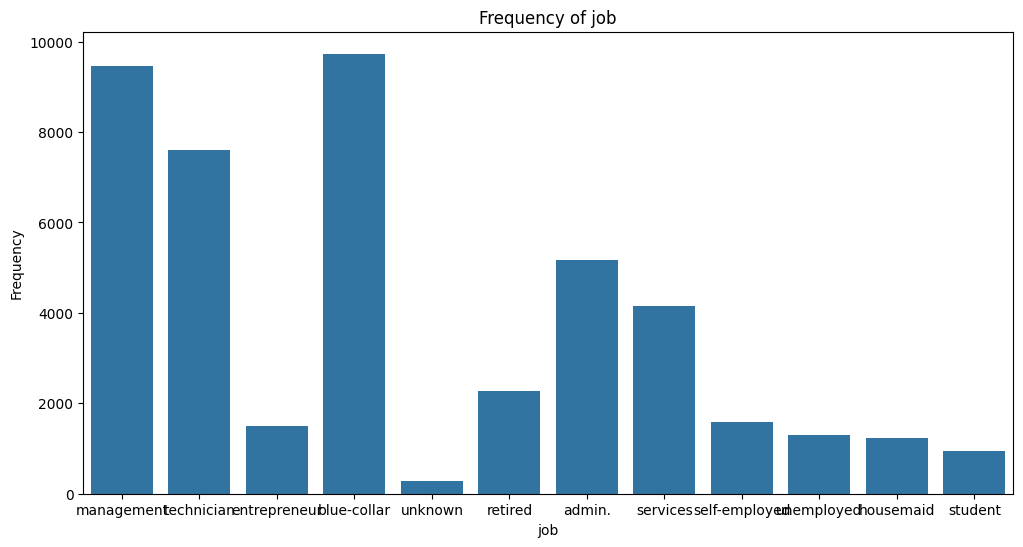

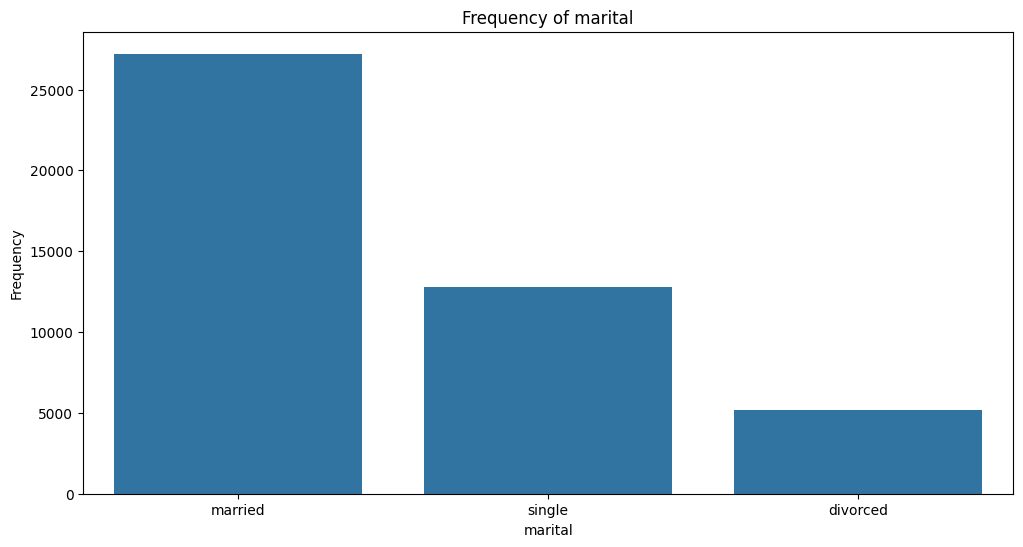

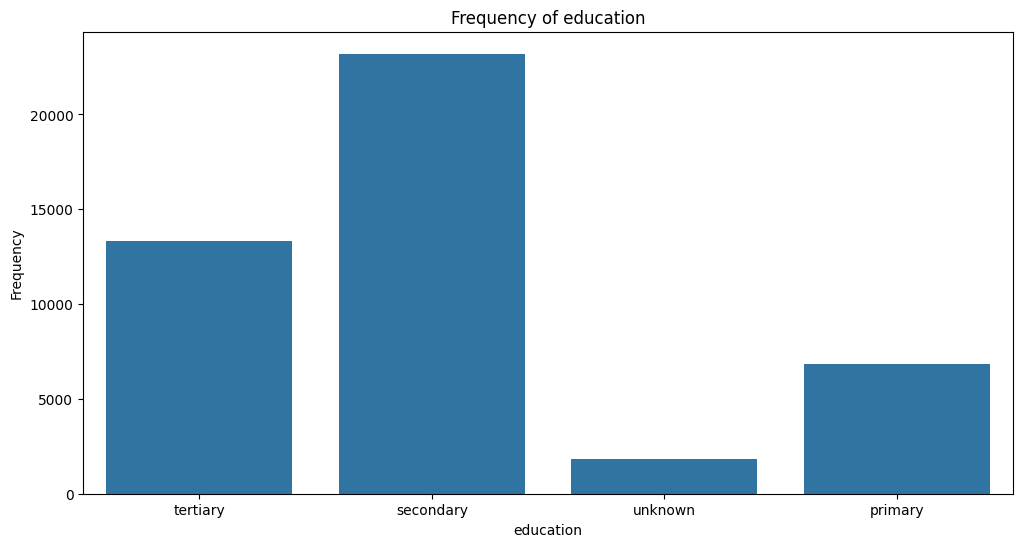

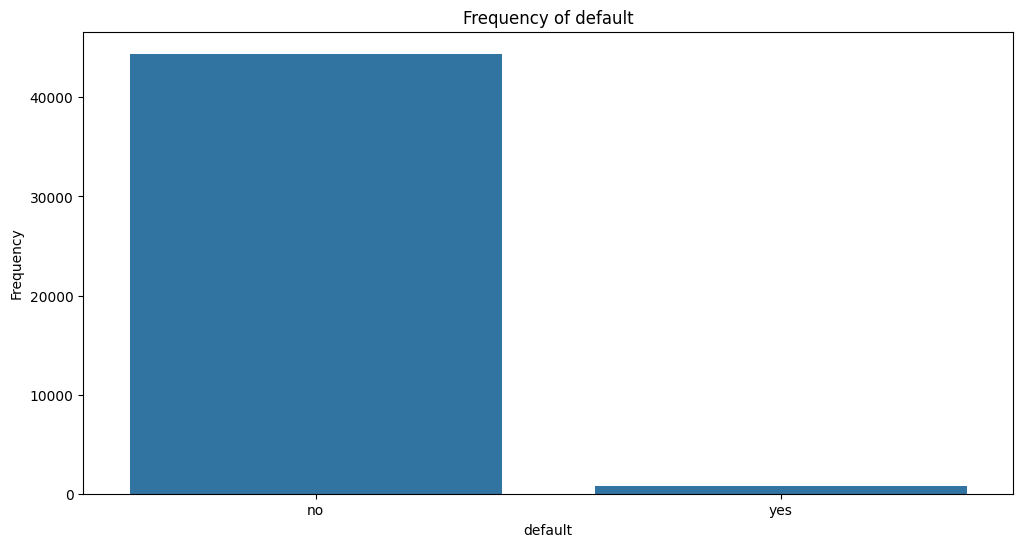

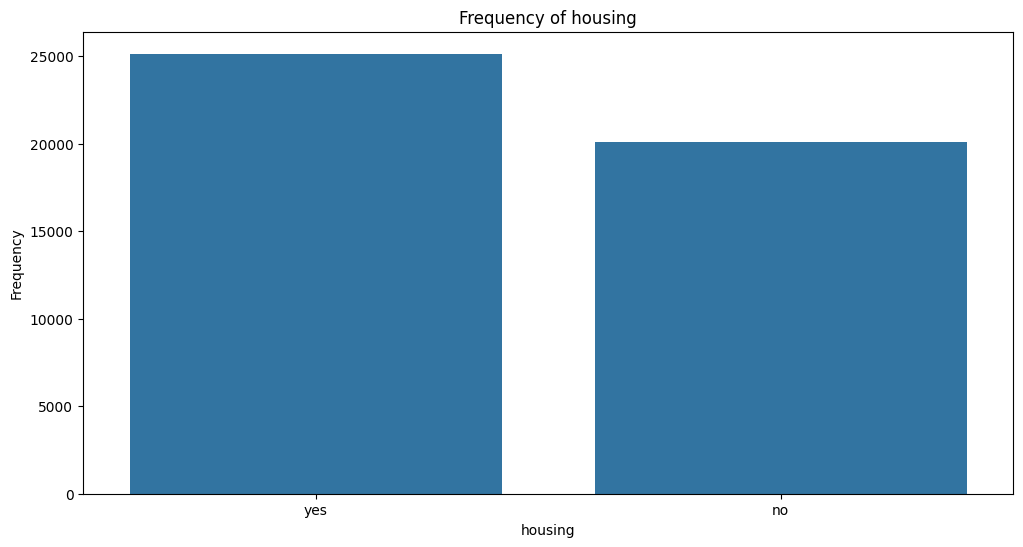

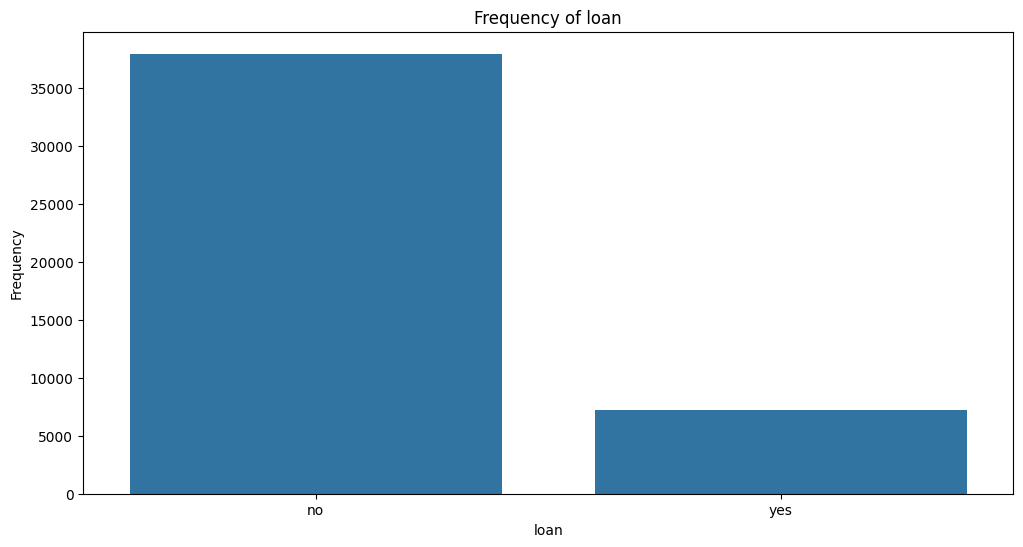

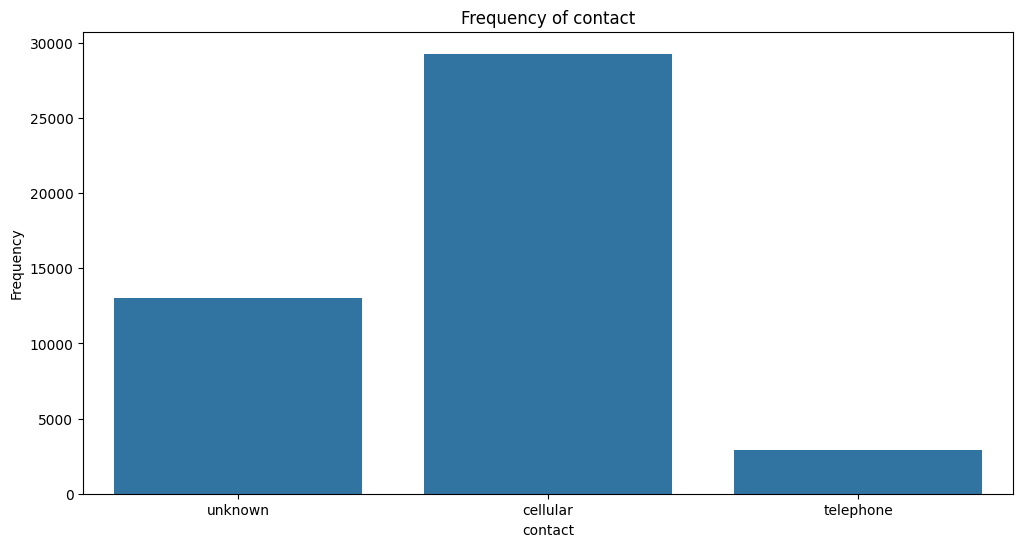

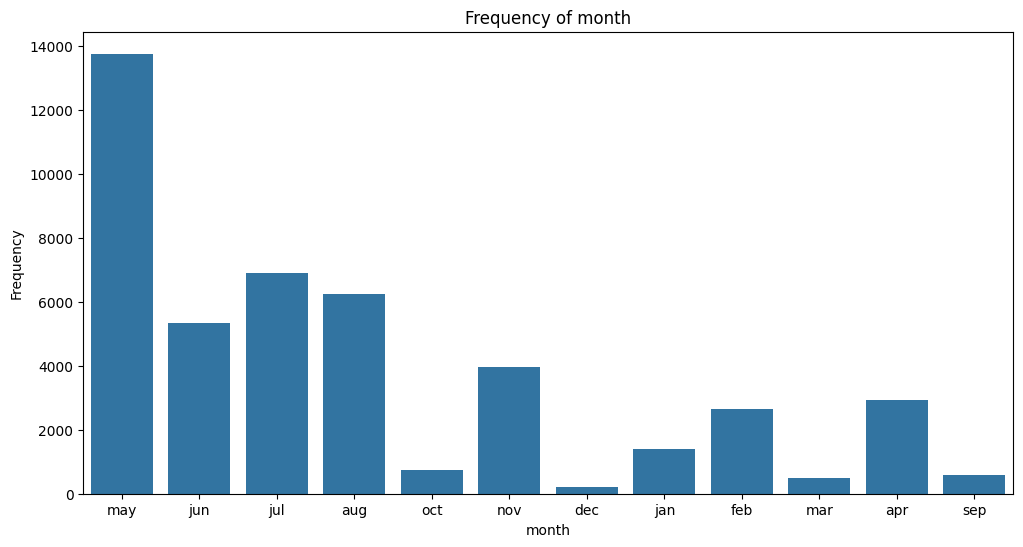

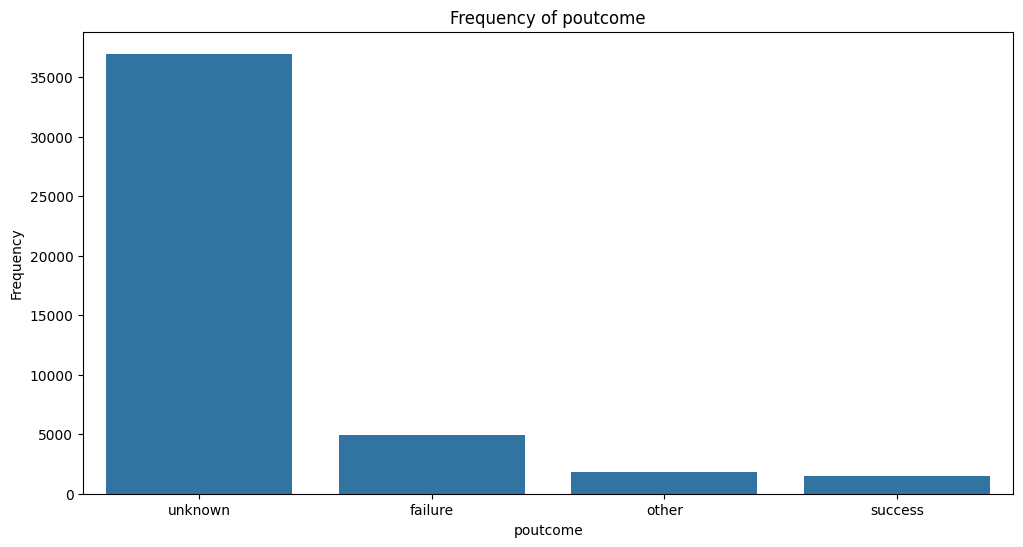

In [8]:
for col_name in categorical_columns:
    plot_barplot(col_name)

 Distribution of Numeric Variables

In [9]:
#box plot
def plot_boxplot(col_name):
    plt.figure(figsize=(9, 3))
    sns.boxplot(data=bank_data, x=col_name)
    plt.title(f"Distribution of {col_name}")
    plt.xlabel(col_name)
    plt.ylabel('Value')
    plt.show()

In [10]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

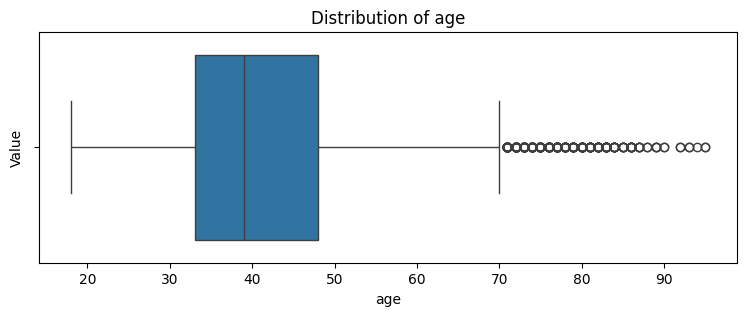

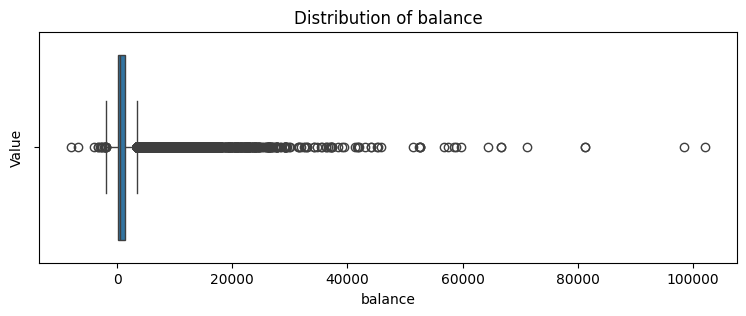

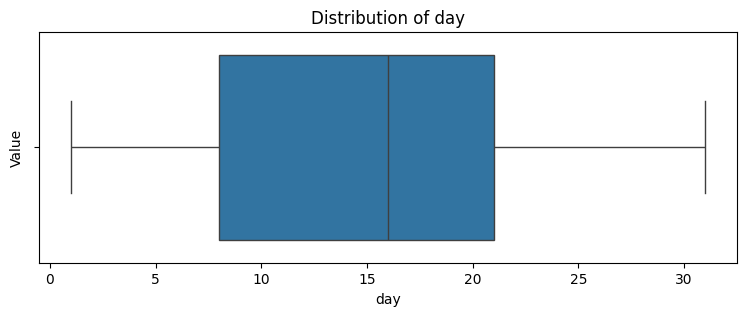

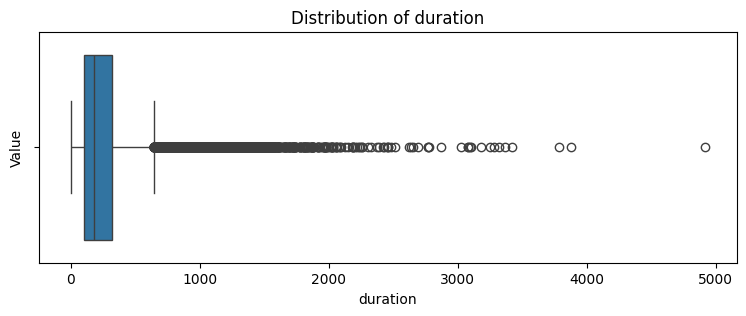

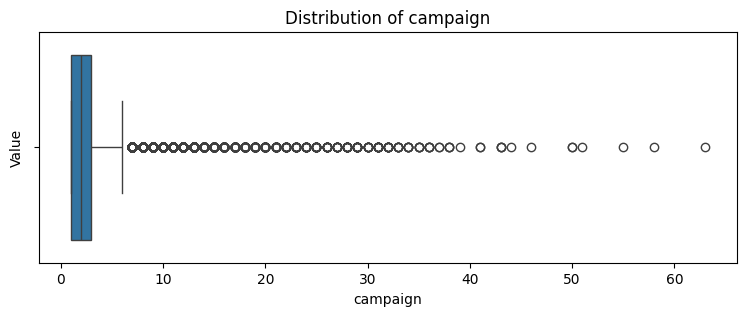

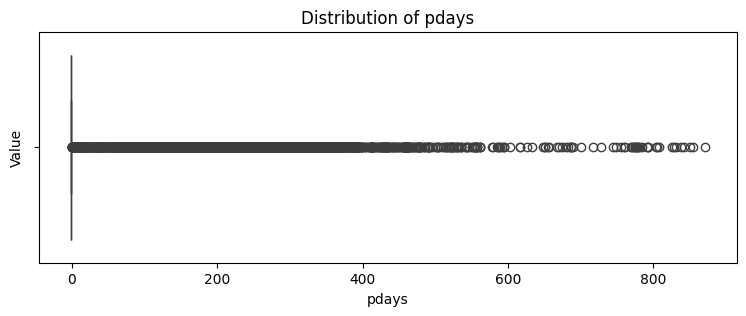

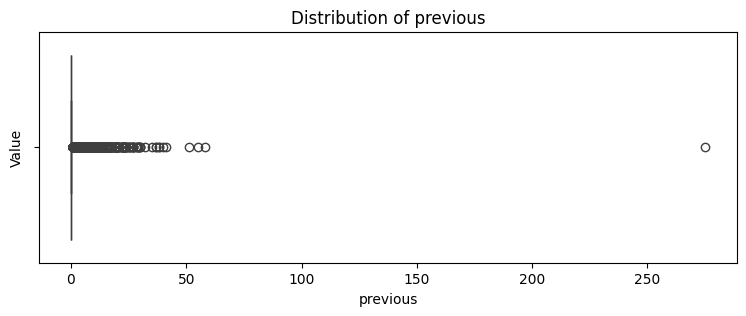

In [11]:
for col_name in numerical_columns:
    plot_boxplot(col_name)

1. most of them have outliers
2. most of them are normally distributed

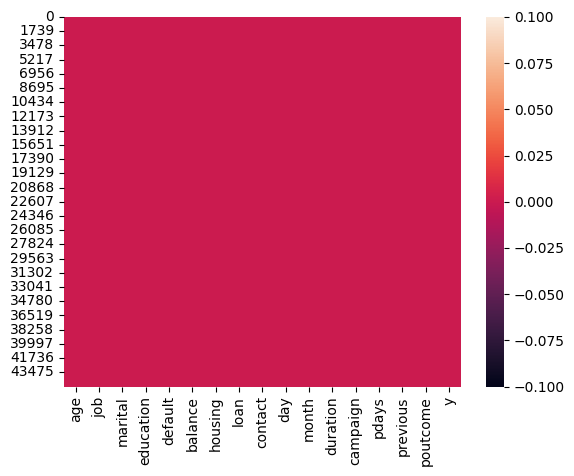

In [12]:
sns.heatmap(bank_data.isnull());

there are no null values

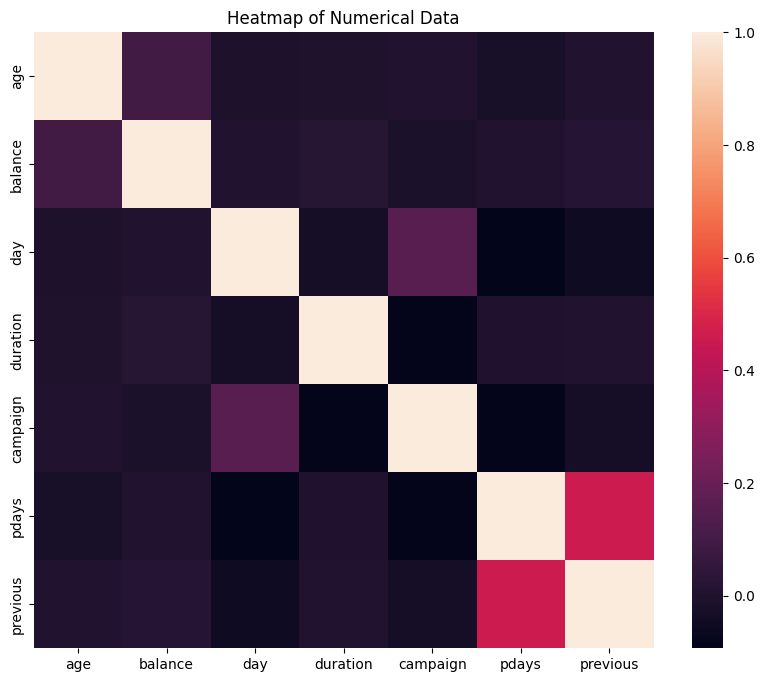

In [13]:
df = pd.DataFrame(bank_data,columns=numerical_columns)
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
plt.title('Heatmap of Numerical Data')
plt.show()


1. pdays and previous are highly correlated

## Data cleaning and manipulation

In [14]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
## handling NaN values
bank_data = bank_data.dropna()
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
#remove outliers
def remove_outliers(df):
    for column in numerical_columns:
         Q1 = df[column].quantile(0.25)
         Q3 = df[column].quantile(0.75)
         IQR = Q3 - Q1
         lower_bound = Q1 - 1.5 * IQR
         upper_bound = Q3 + 1.5 * IQR

            # Filtering out the outliers
         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return  df

In [17]:
bank_data = remove_outliers(bank_data)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


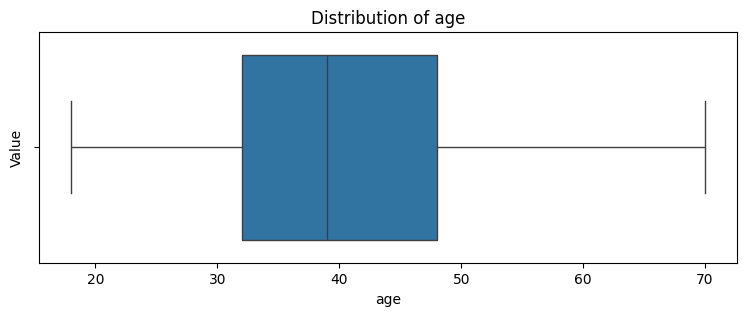

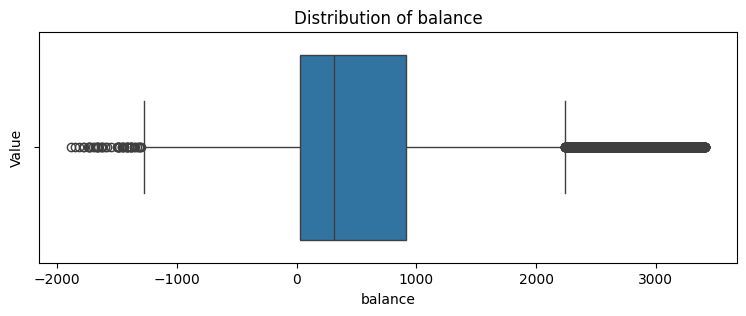

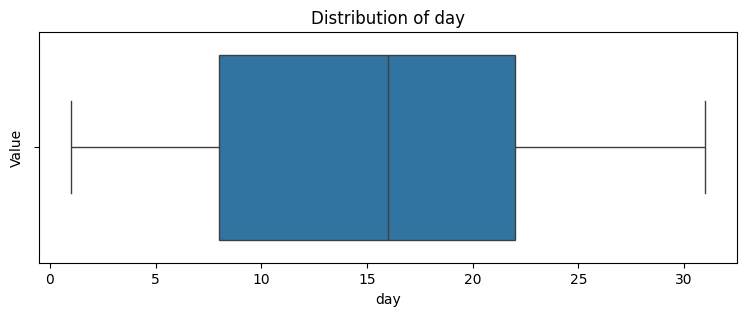

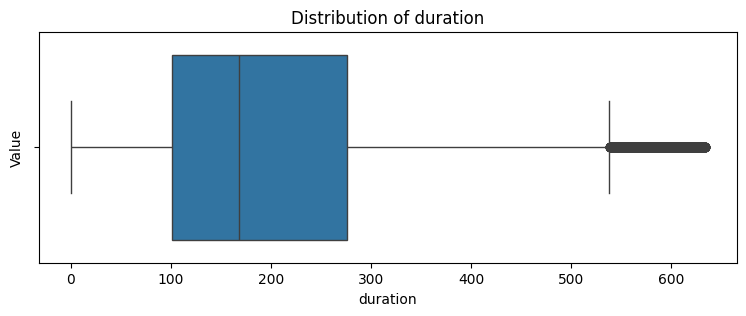

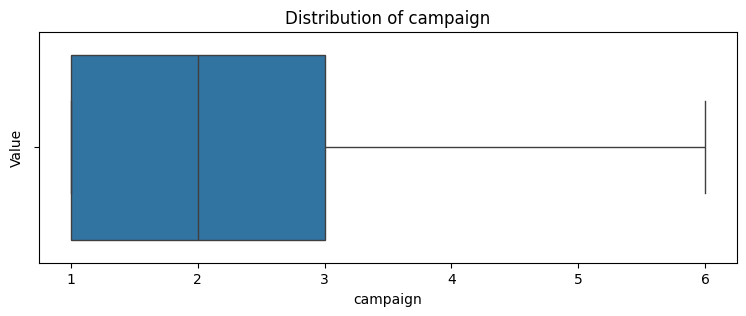

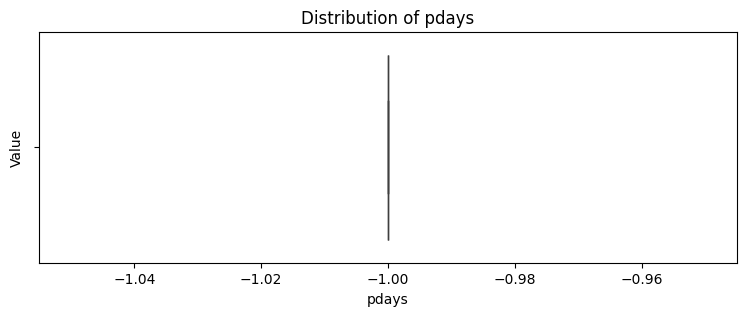

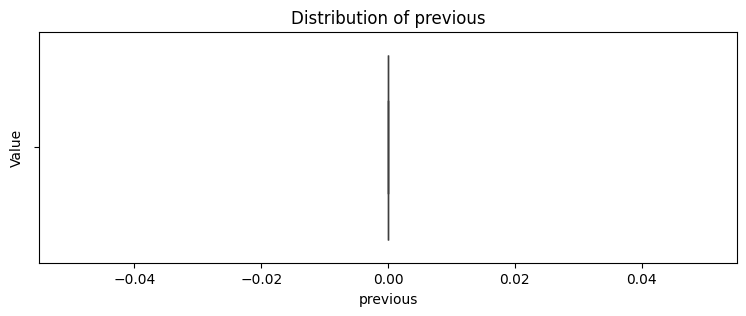

In [18]:
# #box plot
def plot_boxplot(col_name):
    plt.figure(figsize=(9, 3))
    sns.boxplot(data=bank_data, x=col_name)
    plt.title(f"Distribution of {col_name}")
    plt.xlabel(col_name)
    plt.ylabel('Value')
    plt.show()


for col_name in numerical_columns:
    plot_boxplot(col_name)

## handling highly correlated data

In [19]:
threshold = 0.4
high_corr_pair = [(i,j) for i in corr_matrix for j in corr_matrix
                  if i!=j and abs(corr_matrix.loc[i,j])>threshold ]
print("high correlation pair:",high_corr_pair)
for pair in high_corr_pair:
    print(f"{pair[0]} and {pair[1]}:{corr_matrix.loc[pair[0], pair[1]]}")


high correlation pair: [('pdays', 'previous'), ('previous', 'pdays')]
pdays and previous:0.4548196354805043
previous and pdays:0.4548196354805043


In [20]:
feature_to_remove =[]
for i ,j in high_corr_pair:
    if i not in feature_to_remove and j not in feature_to_remove:
        feature_to_remove.append(j)

In [21]:
feature_to_remove

['previous']

In [22]:
bank_data = bank_data.drop(columns=feature_to_remove)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,unknown,no


converting all the non value object to dummy variable

In [23]:
data_encoded = pd.get_dummies(bank_data, columns=categorical_columns)

In [24]:
data_encoded.head()

,age,balance,day,duration,campaign,pdays,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,58,2143,5,261,1,-1,no,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,44,29,5,151,1,-1,no,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,33,2,5,76,1,-1,no,False,False,True,...,False,False,False,False,False,True,False,False,False,True
3,47,1506,5,92,1,-1,no,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,33,1,5,198,1,-1,no,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [25]:
target_col = 'y'
X_bank_data = data_encoded.drop(columns=target_col)
y_bank_data = data_encoded[target_col]

split the data into train and test

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_bank_data,y_bank_data,test_size=0.2,stratify=y_bank_data)

In [41]:
y_train.value_counts(normalize=True)

y
no     0.944556
yes    0.055444
Name: proportion, dtype: float64

## feauture scaling

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fitting the Logistic Regression


In [28]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

## making prediction

In [29]:
y_pred = classifier.predict(X_test)
print(y_pred[:10])

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


## Accuracy

In [30]:
#confusion matrix
matrix = confusion_matrix(y_test, y_pred) 
print(matrix)

[[5242   52]
 [ 261   59]]


In [31]:
precision = precision_score(y_test, y_pred,pos_label='yes')
print(precision)

0.5315315315315315


In [32]:
recall = recall_score(y_test, y_pred,pos_label='no')
print(recall)

0.9901775595013222
